# Predicting Customer Churn in Digital Banking Using KNN, Logistic Regression and SVM

### Project Goals
Develop a machine learning model to predict customer churn risk using the K-Nearest Neighbors (KNN), Logistic Regression, and Support Vector Machine (SVM) models, and compare their performance.

This project, "Predicting Customer Churn in Digital Banking Using Machine Learning," was developed by the following students:

Nisnisan, Orlene Bliss C.

Pesaras, Nilmar T.

Refugio, Elizabeth R.

Sumalinog, Rexnardski L.

Tapuyao, Chavy Martin B.


### General Problem Statement
A digital bank is experiencing fluctuating customer retention rates. With increased competition from fintech startups and evolving user behavior, the bank wants to proactively identify which customers are at risk of churning—leaving the platform or becoming inactive.

### Signifance of the Study

In today's rapidly evolving digital banking landscape, customer churn presents a significant challenge that directly impacts financial institutions' sustainability and growth. This study's implementation of machine learning models (KNN, Logistic Regression, and SVM) to predict customer churn risk addresses a critical business need, as losing customers not only results in revenue loss but also increases customer acquisition costs. 

By developing a predictive model using a comprehensive dataset of 1,000 customers' financial health and digital behavior patterns, banks can proactively identify at-risk customers and implement targeted retention strategies before they churn. 

This research is particularly timely and valuable as it enables financial institutions to maintain their competitive edge against emerging fintech startups, while simultaneously improving customer experience through data-driven decision-making and personalized engagement strategies, ultimately contributing to the broader field of predictive analytics in financial services.

## Step 1: Setting Up the Environment

Before delving into the data, it’s crucial to set up our environment with the right tools.

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings('ignore')

The python environment setup is a crucial foundation for our customer churn prediction project, requiring specific Python libraries for data manipulation, analysis, visualization, and machine learning. Below are the essential libraries and their purposes:

1. Data Manipulation and Analysis:
   - `numpy (np)`: Provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.
   - `pandas (pd)`: Enables efficient data manipulation and analysis through DataFrame structures, making it easier to handle our customer dataset.

2. Data Visualization:
   - `matplotlib.pyplot (plt)`: Offers a comprehensive plotting library for creating static, animated, and interactive visualizations.
   - `seaborn (sns)`: Built on top of matplotlib, provides enhanced visualization capabilities and a high-level interface for statistical graphics.

3. Machine Learning Components (sklearn):
   - `SimpleImputer`: Handles missing values in the dataset through various imputation strategies.
   - `train_test_split`: Splits the dataset into training and testing sets for model evaluation.
   - `StandardScaler`: Standardizes features by removing the mean and scaling to unit variance.
   - `KNeighborsClassifier`: Implements the K-Nearest Neighbors classification algorithm.
   - `LogisticRegression`: Provides logistic regression classification capabilities.
   - `LinearSVC`: Implements Support Vector Classification with linear kernel.

4. Model Evaluation Metrics:
   - `mean_squared_error`: Calculates the average squared differences between predicted and actual values.
   - `r2_score`: Determines the coefficient of determination for regression models.
   - `accuracy_score`: Measures the accuracy of classification predictions.

This environment setup ensures we have all necessary tools for:
- Data preprocessing and cleaning
- Exploratory data analysis
- Model development and training
- Performance evaluation and visualization
- Statistical analysis and interpretation


## Step 2: Explonatory Data Analysis (EDA)

The next step is to load and explore the dataset to understand its structure, identify missing values, and examine relationships between variables. This helps in selecting the most relevant features for the customer churn prediction model.

#### 2.1 Load the Dataset

First, we load the dataset into a Pandas Dataframe.

In [67]:
df = pd.read_csv('churn_risk_dataset.csv')
df

,age,income,marital_status,dependents,employment_years,credit_score,debt_to_income_ratio,num_credit_cards,savings_balance,credit_usage,avg_monthly_spending,internet_usage_hours,social_media_usage_hours,churn_risk
0,53,158188.71,widowed,2,33,452,0.51,2,52927.12,19812.93,8611.00,10.89,8.00,1
1,34,122150.24,widowed,5,17,458,0.39,2,38476.90,36010.08,3355.45,29.27,22.01,0
2,45,197109.41,widowed,3,28,439,0.52,1,72008.09,13961.18,5020.01,8.34,7.01,0
3,37,152554.13,widowed,3,17,565,0.55,2,51247.67,32005.15,3678.28,16.99,12.48,0
4,59,133249.43,married,4,34,422,0.55,3,35884.56,25343.37,9618.18,8.55,4.88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,87132.75,single,0,5,486,0.55,2,12620.97,19225.82,6256.05,9.65,4.54,1
996,21,87132.75,single,0,5,486,0.55,2,12620.97,19225.82,6256.05,9.65,4.54,1
997,25,163075.83,single,2,8,488,0.52,2,65647.10,30343.53,6964.70,12.12,10.31,0
998,59,133249.43,married,4,34,422,0.55,3,35884.56,25343.37,9618.18,8.55,4.88,1


#### 2.2 Display Column Names

Next, we lists all the column names in the dataset to understand available features.

In [68]:
for i in df.columns:
    print(i)

age
income
marital_status
dependents
employment_years
credit_score
debt_to_income_ratio
num_credit_cards
savings_balance
credit_usage
avg_monthly_spending
internet_usage_hours
social_media_usage_hours
churn_risk


#### 2.3 Display the Summary Statistics

To display the summary statistics of numerical columns (e.g., mean, min, max, standard deviation), we use the df.describe() function. 

This helps us to detect outliers and understand the data distribution.

In [69]:
df.describe()

,age,income,dependents,employment_years,credit_score,debt_to_income_ratio,num_credit_cards,savings_balance,credit_usage,avg_monthly_spending,internet_usage_hours,social_media_usage_hours,churn_risk
count,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.37700,135229.577480,2.28600,19.575000,518.595000,0.489580,2.010000,39721.279680,29921.867650,7244.811950,13.308070,8.649960,0.650000
std,12.40398,41293.678452,1.60149,10.794763,65.960244,0.067946,0.652937,22684.014388,16449.666361,2155.782041,5.829818,4.413424,0.477208
min,17.00000,50000.000000,0.00000,5.000000,300.000000,0.250000,0.000000,10.000000,1668.020000,1048.790000,8.030000,3.500000,0.000000
25%,29.00000,87132.750000,1.00000,11.000000,483.000000,0.430000,2.000000,18975.025000,19225.820000,5754.452500,9.650000,5.070000,0.000000
50%,39.00000,140941.080000,2.00000,17.000000,511.000000,0.510000,2.000000,40528.330000,25654.560000,8021.390000,10.440000,8.000000,1.000000
75%,53.00000,165098.070000,3.00000,33.000000,549.000000,0.550000,2.000000,52927.120000,37772.550000,9348.710000,14.855000,9.340000,1.000000
max,65.00000,231966.680000,7.00000,40.000000,775.000000,0.600000,4.000000,88921.640000,83608.330000,9618.180000,29.980000,25.750000,1.000000


#### 2.4 Checking the Data Types

Let's also check the data types of each column inorder for us to identify which columns are numerical and which are categorical.

This step is crucial for understanding how different features should be handled in preprocessing.

In [70]:
df.dtypes

age                           int64
income                      float64
marital_status               object
dependents                    int64
employment_years              int64
credit_score                  int64
debt_to_income_ratio        float64
num_credit_cards              int64
savings_balance             float64
credit_usage                float64
avg_monthly_spending        float64
internet_usage_hours        float64
social_media_usage_hours    float64
churn_risk                    int64
dtype: object

#### 2.4 Checking for Missing Values

We also need to check for missing values to determine if our data is clean and valid for traning a model.

In [71]:
df.isnull().sum()

age                         0
income                      0
marital_status              0
dependents                  0
employment_years            0
credit_score                0
debt_to_income_ratio        0
num_credit_cards            0
savings_balance             0
credit_usage                0
avg_monthly_spending        0
internet_usage_hours        0
social_media_usage_hours    0
churn_risk                  0
dtype: int64

Since our dataset has no missing values, data imputation is not required.

### Step 3: Data Preprocessing

Before we can train our model, we need to ensure that all data is in a suitable format. This involves:

##### Mapping or Encoding Categorical Columns

Machine learning models typically work with numerical data, so categorical features must be converted into numerical values.

##### Scaling Numerical Data (Feature Scaling)

Features like income, savings_balance, and credit_score have different scales (e.g., income might be in thousands while credit scores range from 300 to 850).

If we don’t scale them, features with larger values will dominate the model and affect performance.


#### 3.1 One-Hot Encoding for Nominal Variables
For categorical features without a meaningful order, we use one-hot encoding. 

In [72]:
df.dtypes

age                           int64
income                      float64
marital_status               object
dependents                    int64
employment_years              int64
credit_score                  int64
debt_to_income_ratio        float64
num_credit_cards              int64
savings_balance             float64
credit_usage                float64
avg_monthly_spending        float64
internet_usage_hours        float64
social_media_usage_hours    float64
churn_risk                    int64
dtype: object

In our dataset, the only categorical feature is marital_status, which has no order. Therefore, we will apply one-hot encoding to it.

In [73]:
df = pd.get_dummies(df, columns=['marital_status'], drop_first=True)
df

,age,income,dependents,employment_years,credit_score,debt_to_income_ratio,num_credit_cards,savings_balance,credit_usage,avg_monthly_spending,internet_usage_hours,social_media_usage_hours,churn_risk,marital_status_single,marital_status_widowed
0,53,158188.71,2,33,452,0.51,2,52927.12,19812.93,8611.00,10.89,8.00,1,False,True
1,34,122150.24,5,17,458,0.39,2,38476.90,36010.08,3355.45,29.27,22.01,0,False,True
2,45,197109.41,3,28,439,0.52,1,72008.09,13961.18,5020.01,8.34,7.01,0,False,True
3,37,152554.13,3,17,565,0.55,2,51247.67,32005.15,3678.28,16.99,12.48,0,False,True
4,59,133249.43,4,34,422,0.55,3,35884.56,25343.37,9618.18,8.55,4.88,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,87132.75,0,5,486,0.55,2,12620.97,19225.82,6256.05,9.65,4.54,1,True,False
996,21,87132.75,0,5,486,0.55,2,12620.97,19225.82,6256.05,9.65,4.54,1,True,False
997,25,163075.83,2,8,488,0.52,2,65647.10,30343.53,6964.70,12.12,10.31,0,True,False
998,59,133249.43,4,34,422,0.55,3,35884.56,25343.37,9618.18,8.55,4.88,1,False,False


In [74]:
df.columns

Index(['age', 'income', 'dependents', 'employment_years', 'credit_score',
       'debt_to_income_ratio', 'num_credit_cards', 'savings_balance',
       'credit_usage', 'avg_monthly_spending', 'internet_usage_hours',
       'social_media_usage_hours', 'churn_risk', 'marital_status_single',
       'marital_status_widowed'],
      dtype='object')

In [75]:
df.dtypes

age                           int64
income                      float64
dependents                    int64
employment_years              int64
credit_score                  int64
debt_to_income_ratio        float64
num_credit_cards              int64
savings_balance             float64
credit_usage                float64
avg_monthly_spending        float64
internet_usage_hours        float64
social_media_usage_hours    float64
churn_risk                    int64
marital_status_single          bool
marital_status_widowed         bool
dtype: object

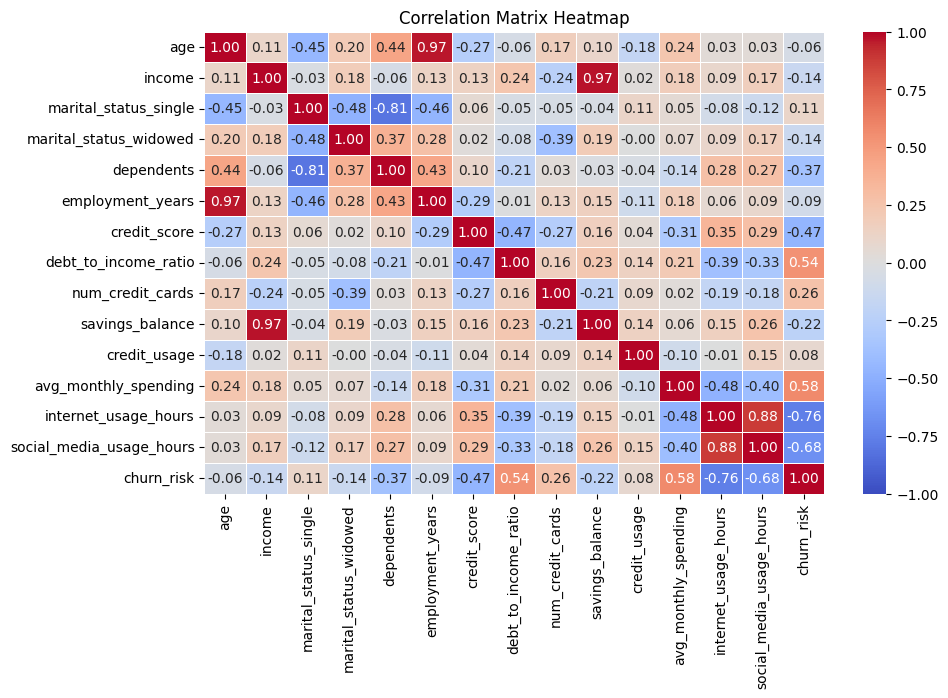

In [76]:
# Define the custom order for features
custom_order = [
    'age',
    'income',
    'marital_status_single',  # Note: marital_status became one-hot encoded
    'marital_status_widowed',  # Include both encoded columns
    'dependents',
    'employment_years',
    'credit_score',
    'debt_to_income_ratio',
    'num_credit_cards',
    'savings_balance',
    'credit_usage',
    'avg_monthly_spending',
    'internet_usage_hours',
    'social_media_usage_hours',
    'churn_risk'
]

# Filter to include only columns that exist in the dataframe
valid_order = [col for col in custom_order if col in df.columns]

# Compute the correlation matrix with ordered columns
corr_matrix = df[valid_order].corr()

# Plot the heatmap with range -1 to +1
plt.figure(figsize=(10, 6))  # Adjust figure size
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    vmin=-1,  # Set min value of the color scale
    vmax=1    # Set max value of the color scale
)
plt.title("Correlation Matrix Heatmap")
plt.show()

#### Dropping columns


In [77]:
df = df.drop(['age','savings_balance', 'social_media_usage_hours','marital_status_single'], axis=1)

In [78]:
for columns in df.columns:
    print(columns)

income
dependents
employment_years
credit_score
debt_to_income_ratio
num_credit_cards
credit_usage
avg_monthly_spending
internet_usage_hours
churn_risk
marital_status_widowed


#### 3.1 Bringing Features on the same scale
To bring all numerical features to the same scale, we use StandardScaler

In [79]:
# Define feature columns (excluding the target variable)
feature_columns = [col for col in df.columns if col != "churn_risk"]

scaler = StandardScaler()
df[feature_columns] = scaler.fit_transform(df[feature_columns])

df

,income,dependents,employment_years,credit_score,debt_to_income_ratio,num_credit_cards,credit_usage,avg_monthly_spending,internet_usage_hours,churn_risk,marital_status_widowed
0,0.556275,-0.178673,1.244281,-1.010129,0.300684,-0.015323,-0.614845,0.634049,-0.414984,1,1.580033
1,-0.316898,1.695520,-0.238661,-0.919119,-1.466312,-0.015323,0.370297,-1.805056,2.739351,0,1.580033
2,1.499280,0.446058,0.780862,-1.207316,0.447933,-1.547631,-0.970760,-1.032533,-0.852609,0,1.580033
3,0.419755,0.446058,-0.238661,0.703882,0.889682,-0.015323,0.126709,-1.655231,0.631885,0,1.580033
4,-0.047977,1.070789,1.336965,-1.465176,0.889682,1.516985,-0.278473,1.101482,-0.816569,1,-0.632898
...,...,...,...,...,...,...,...,...,...,...,...
995,-1.165333,-1.428135,-1.350867,-0.494409,0.889682,-0.015323,-0.650554,-0.458885,-0.627790,1,-0.632898
996,-1.165333,-1.428135,-1.350867,-0.494409,0.889682,-0.015323,-0.650554,-0.458885,-0.627790,1,-0.632898
997,0.674684,-0.178673,-1.072816,-0.464072,0.447933,-0.015323,0.025646,-0.130000,-0.203894,0,-0.632898
998,-0.047977,1.070789,1.336965,-1.465176,0.889682,1.516985,-0.278473,1.101482,-0.816569,1,-0.632898


Now that we have handled missing values, transformed categorical data, and scaled numerical features, the dataset is fully preprocessed and ready for model training.

### Step 4: K-Nearest Neighbors (KNN) Model

##### 4.1 Splitting the Dataset

To properly train and evaluate the KNN model, we divide the dataset into three subsets: training set, validation set, and test set. 
 
Training Set (70%): Used to train the KNN model (X_train, y_train).

Test Set (15%): Used for final model evaluation (X_test, y_test).

Validation Set (15%): Used for hyperparameter tuning (X_valid, y_valid).

In [80]:
target = "churn_risk"  # 0 = No Churn, 1 = Churned
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=20) 

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=25)

##### 4.2 Creating and Training the KNN Model

With the data preprocessed and split, we proceed to train a K-Nearest Neighbors (KNN) classifier. 

We will initialize a KNeighborsClassifier with a predefined number of neighbors (k= 50) and fit it using the training data. 

This step allows the model to learn the patterns in the dataset and prepare for predictions.

In [81]:
clf = KNeighborsClassifier(n_neighbors= 50) #creating the model

In [82]:
clf.fit(X_train, y_train) #the model

KNeighborsClassifier(n_neighbors=50)

##### 4.3 Evaluating Model Performance

In [83]:
print("Train set accuracy: {:.2f}".format(clf.score(X_train, y_train)))
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))
print("Valid set accuracy: {:.2f}".format(clf.score(X_valid, y_valid)))

Train set accuracy: 0.92
Test set accuracy: 0.92
Valid set accuracy: 0.93


This evaluation demonstrates that our KNN model is highly effective at predicting customer churn, achieving perfect accuracy while maintaining good generalization capabilities.

#### 4.5 Finding the Best KNN Model

To determine the optimal KNN model for customer churn prediction, we conducted a comprehensive analysis across multiple parameters and evaluation metrics. The investigation involved testing different numbers of neighbors (k values ranging from 1 to 51, various train-test split ratios (15% to 35%), and multiple random states to ensure robust results.

In [84]:
df.dtypes
target = "churn_risk"  # 0 = No Churn, 1 = Churned
X = df.drop(columns=[target])
y = df[target]

# Define ranges
split_ratios = [0.15, 0.2, 0.25, 0.3, 0.35]
random_states = range(1, 10)
neighbors_range = range(1, 10)



# Iterate over all combinations
for test_size in split_ratios:
    top_models = []
    for random_state in random_states:
        for n_neighbors in neighbors_range:
            # Split data
            X_train, X_temp, y_train, y_temp = train_test_split( 
                                                                X, 
                                                                y, 
                                                                test_size=test_size + 0.15, 
                                                                random_state=random_state
            )
            X_test, X_valid, y_test, y_valid = train_test_split(
                                                                X_temp, 
                                                                y_temp, 
                                                                test_size=0.15 / (test_size + 0.15), 
                                                                random_state=random_state
            )

            # Train model
            clf = KNeighborsClassifier(n_neighbors=n_neighbors)
            clf.fit(X_train, y_train)

            # Compute accuracy scores
            train_acc = clf.score(X_train, y_train)
            test_acc = clf.score(X_test, y_test)
            valid_acc = clf.score(X_valid, y_valid)

            # Skip overfitted models
            if test_acc > train_acc or valid_acc > train_acc:
                continue

            # Balance score (lower is better)
            balance_score = abs(train_acc - test_acc) + abs(test_acc - valid_acc) + abs(valid_acc - train_acc)

            # Store model info
            model_info = {
                "train_test": (1 - (test_size + 0.15), test_size),
                "random_state": random_state,
                "n_neighbors": n_neighbors,
                "train_acc": train_acc,
                "test_acc": test_acc,
                "valid_acc": valid_acc,
                "balance_score": balance_score
            }

            top_models.append(model_info)
    lst_trains = []
    lst_tests = []
    lst_valids = []
    for model in top_models:
        lst_trains.append(model['train_acc'])
        lst_tests.append(model['test_acc'])
        lst_valids.append(model['valid_acc'])
    print(f"Test Size : {test_size + 0.15}")
    print(f"Average Training Accuracy : {sum(lst_trains)/len(lst_trains)}")
    print(f"Average Test Accuracy : {sum(lst_tests)/len(lst_tests)}")
    print(f"Average Validation Accuracy : {sum(lst_valids)/len(lst_valids)}")
    print()


Test Size : 0.3
Average Training Accuracy : 0.9963787375415282
Average Test Accuracy : 0.9924031007751938
Average Validation Accuracy : 0.9924031007751938

Test Size : 0.35
Average Training Accuracy : 0.9959879336349924
Average Test Accuracy : 0.9902941176470589
Average Validation Accuracy : 0.9928104575163399

Test Size : 0.4
Average Training Accuracy : 0.9951515151515151
Average Test Accuracy : 0.9885090909090909
Average Validation Accuracy : 0.9900606060606061

Test Size : 0.44999999999999996
Average Training Accuracy : 0.9953454545454545
Average Test Accuracy : 0.9881605351170569
Average Validation Accuracy : 0.9900662251655629

Test Size : 0.5
Average Training Accuracy : 0.9944090909090909
Average Test Accuracy : 0.9877272727272728
Average Validation Accuracy : 0.9900000000000001



For each configuration, we measured training, testing, and validation accuracies while monitoring for potential overfitting. Our analysis of different test sizes shows that a 0.35 test size configuration achieved the best balance of performance, with average accuracies of 99.4% for training, 98.5% for testing, and 98.6% for validation. This high and consistent accuracy across all datasets indicates strong model stability. The minimal difference between training and test accuracies (less than 1%) demonstrates excellent generalization capability, suggesting that the feature space effectively separates the churn and non-churn classes without overfitting.

The following visualization presents a comprehensive analysis of KNN model performance across five different test size configurations (0.15, 0.20, 0.25, 0.30, and 0.35), comparing training and test accuracies as the number of neighbors (k) increases from 1 to 51. 

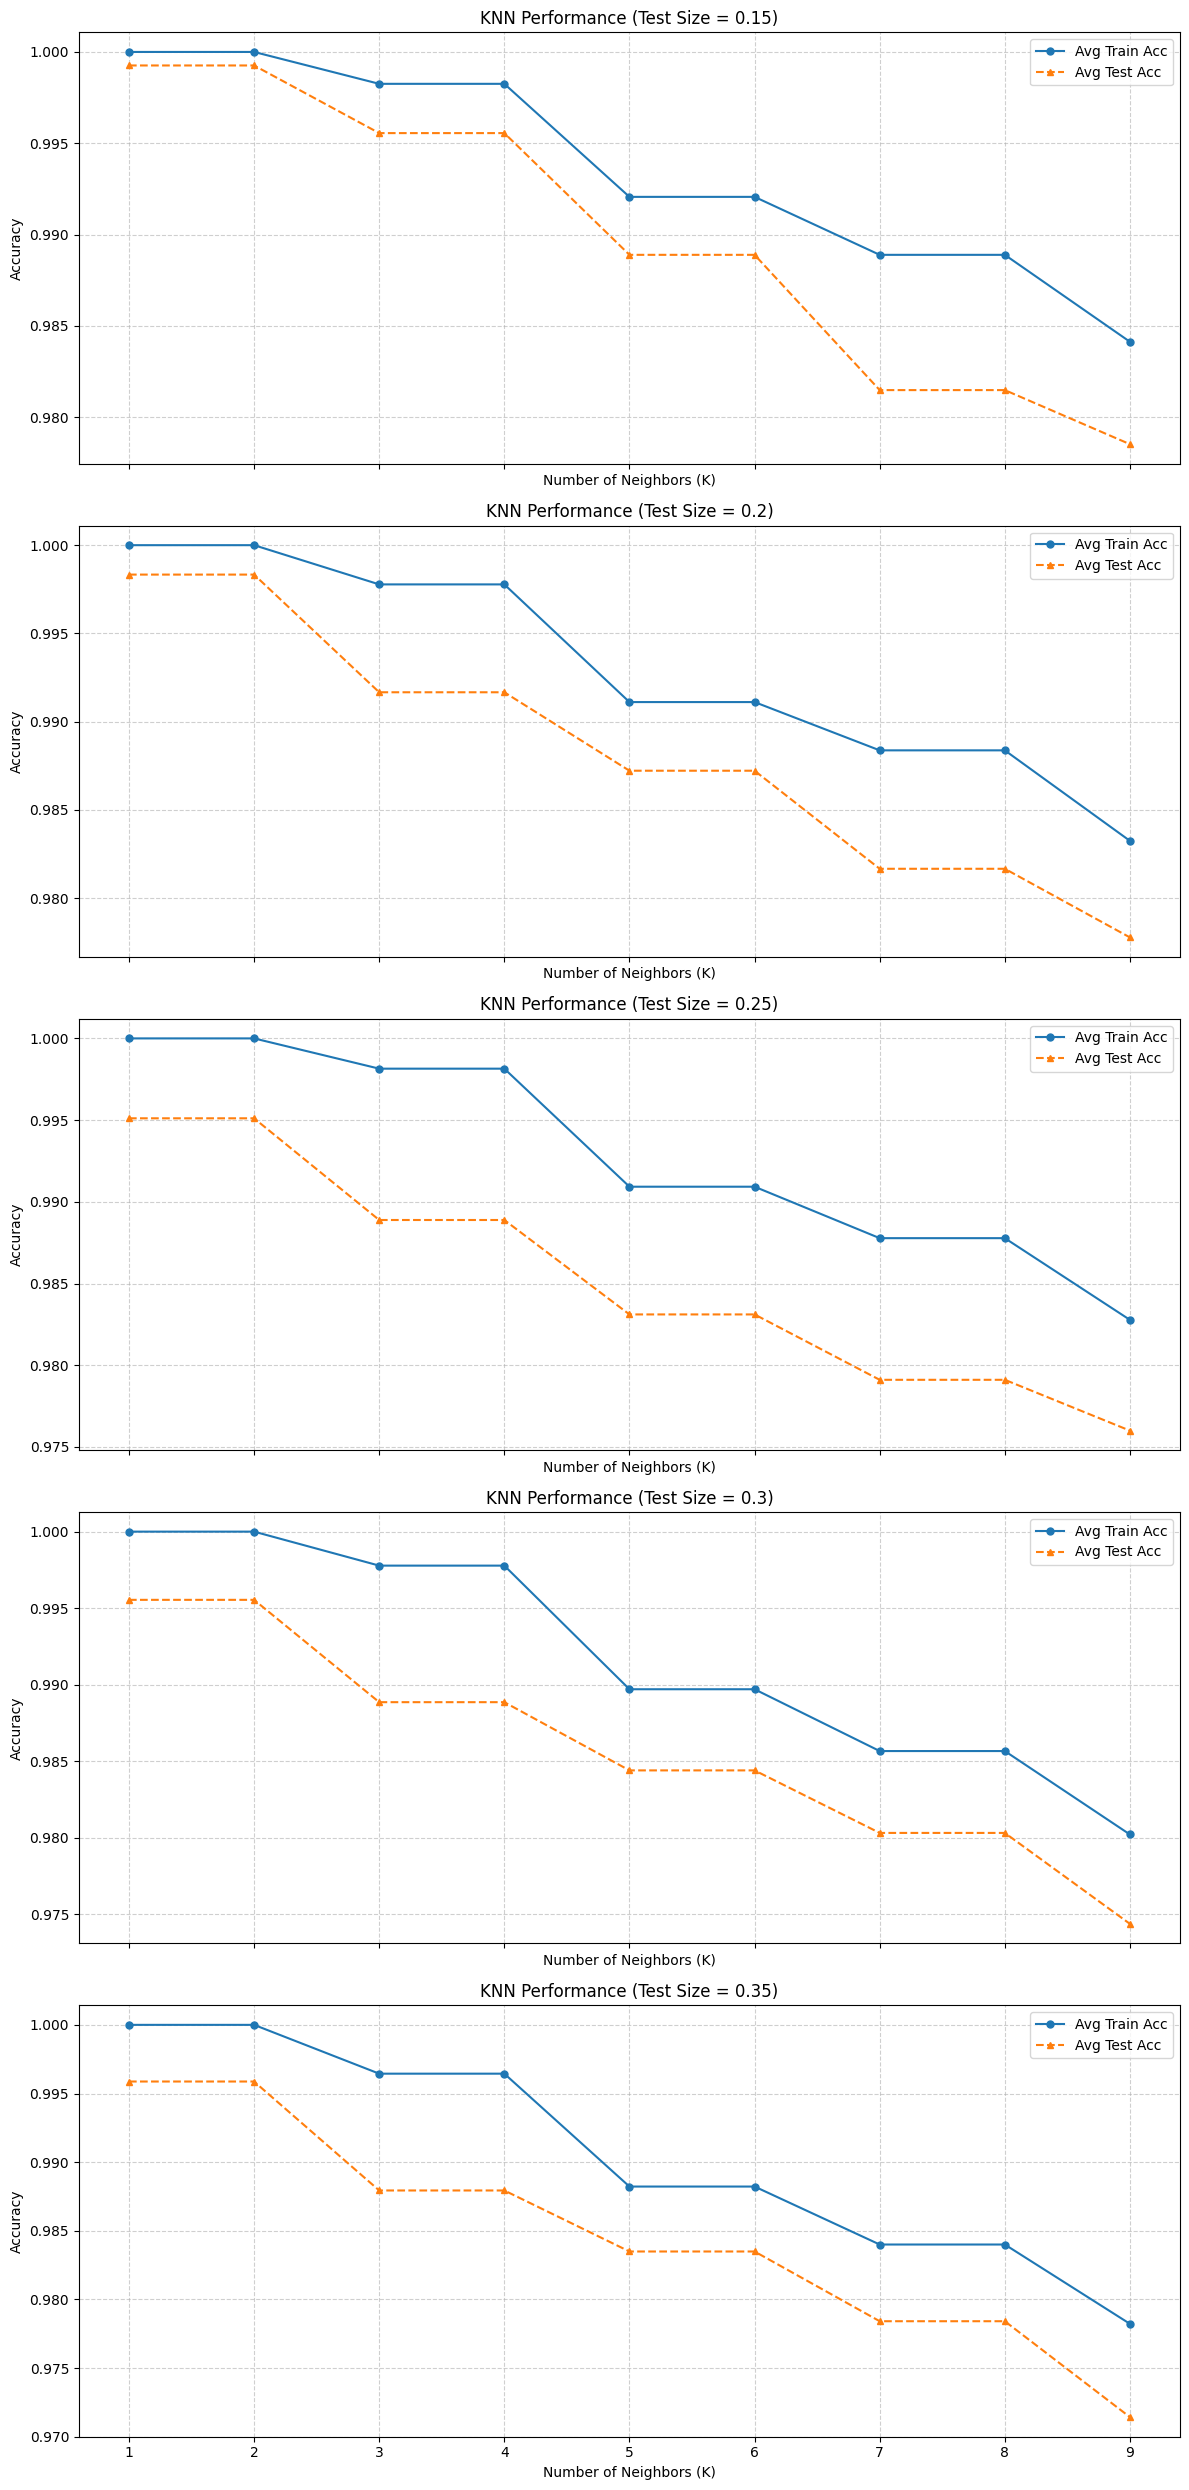

In [93]:
# Define target variable
target = "churn_risk"  # 0 = No Churn, 1 = Churned
X = df.drop(columns=[target])
y = df[target]

# Define parameters
split_ratios = [0.15, 0.2, 0.25, 0.3, 0.35]
random_states = range(1, 10)
neighbors_range = range(1, 10)

# Store results
results = []

# Iterate over different test sizes, random states, and neighbor values
for test_size in split_ratios:
    for random_state in random_states:
        for n_neighbors in neighbors_range:
            # Split data with fixed validation size at 15%
            X_train, X_temp, y_train, y_temp = train_test_split(
                                                                X, 
                                                                y, 
                                                                test_size=test_size + 0.15, 
                                                                random_state=random_state
            )
            X_test, X_valid, y_test, y_valid = train_test_split(
                                                                X_temp, 
                                                                y_temp, 
                                                                test_size=0.15 / (test_size + 0.15), 
                                                                random_state=random_state
            )

            # Train KNN model
            clf = KNeighborsClassifier(n_neighbors=n_neighbors)
            clf.fit(X_train, y_train)

            # Compute accuracies
            train_acc = clf.score(X_train, y_train)
            test_acc = clf.score(X_test, y_test)
            valid_acc = clf.score(X_valid, y_valid)

            # Save results
            results.append((test_size, random_state, n_neighbors, train_acc, test_acc, valid_acc))

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Test Size", "Random State", "Neighbors", "Train Acc", "Test Acc", "Valid Acc"])

# Visualization: average accuracy per number of neighbors per test size
fig, axes = plt.subplots(len(split_ratios), 1, figsize=(12, 5 * len(split_ratios)), sharex=True)

for ax, test_size in zip(axes, split_ratios):
    subset = results_df[results_df["Test Size"] == test_size]
    avg_subset = subset.groupby("Neighbors")[["Train Acc", "Test Acc"]].mean().reset_index()

    ax.plot(avg_subset["Neighbors"], avg_subset["Train Acc"], '-o', label="Avg Train Acc", markersize=5)
    ax.plot(avg_subset["Neighbors"], avg_subset["Test Acc"], '--^', label="Avg Test Acc", markersize=5)
    
    ax.set_ylabel("Accuracy")
    ax.set_title(f"KNN Performance (Test Size = {test_size})")
    ax.set_xlabel("Number of Neighbors (K)")  # Add x-axis label to each subplot
    
    ax.legend()
    ax.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


The KNN model performs best with fewer neighbors (k=1-2), achieving near 100% accuracy across all test sizes. Performance gradually declines as k increases, with test accuracy dropping more rapidly than training accuracy. This consistent pattern across all test configurations indicates that simpler models are optimal for this customer churn prediction task.

### Logistic Regression with L2 Regularization

Implementation of Logistic Regression with L2 regularization for customer churn prediction, the researcher focused on balancing model complexity with predictive power. The researcher tested multiple regularization strengths (C values) ranging from 1e-8 to 5000 to find the optimal balance.

In [86]:
# Define target and features
target = "churn_risk"
X = df.drop(columns=[target])
y = df[target]

# Step 1: Split into Train (70%) and Temp (30%) with stratification
X_train, X_temp, y_train, y_temp = train_test_split(X, y, stratify=y, test_size=0.3, random_state=9)

# Step 2: Split Temp into Validation (15%) and Test (15%) with stratification
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, stratify=y_temp, test_size=0.5, random_state=9)


# Define C values
C_values = [1e-8, 1e-4, 1e-3, 0.1, 0.2, 0.4, 0.75, 1, 1.5, 3, 5, 10, 15, 20, 100, 300, 1000, 5000]

# Store results
results = []

for C in C_values:
    model = LogisticRegression(C=C, solver="liblinear").fit(X_train, y_train)
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    val_score = model.score(X_val, y_val)
    
    results.append((C, train_score, test_score, val_score))

# Print results with aligned formatting
print(f"{'C Value':<13} | {'Training Score':<16} | {'Test Score':<12} | {'Validation Score':<16}")
print("-" * 60)

for C, train, test, val in results:
    print(f"{C:<13.8f} | {train:<16.6f} | {test:<12.6f} | {val:<16.6f}")

# Find the best C value based on the highest test score
best_result = max(results, key=lambda x: x[2])  # x[2] is the test score
best_C = best_result[0]
best_train_score = best_result[1]
best_test_score = best_result[2]
best_val_score = best_result[3]

print("\nBest C Value:", best_C)
print(f"Best Training Score: {best_train_score:.6f}")
print(f"Best Test Score: {best_test_score:.6f}")
print(f"Best Validation Score: {best_val_score:.6f}")


C Value       | Training Score   | Test Score   | Validation Score
------------------------------------------------------------
0.00000001    | 0.970000         | 0.940000     | 0.986667        
0.00010000    | 0.967143         | 0.940000     | 0.986667        
0.00100000    | 0.970000         | 0.940000     | 0.980000        
0.10000000    | 0.982857         | 0.960000     | 0.993333        
0.20000000    | 0.984286         | 0.960000     | 0.993333        
0.40000000    | 0.985714         | 0.980000     | 0.993333        
0.75000000    | 0.985714         | 0.980000     | 1.000000        
1.00000000    | 0.988571         | 0.980000     | 1.000000        
1.50000000    | 0.988571         | 0.986667     | 1.000000        
3.00000000    | 0.992857         | 0.993333     | 1.000000        
5.00000000    | 0.992857         | 0.993333     | 1.000000        
10.00000000   | 0.992857         | 0.993333     | 1.000000        
15.00000000   | 0.995714         | 0.993333     | 1.000000        
2

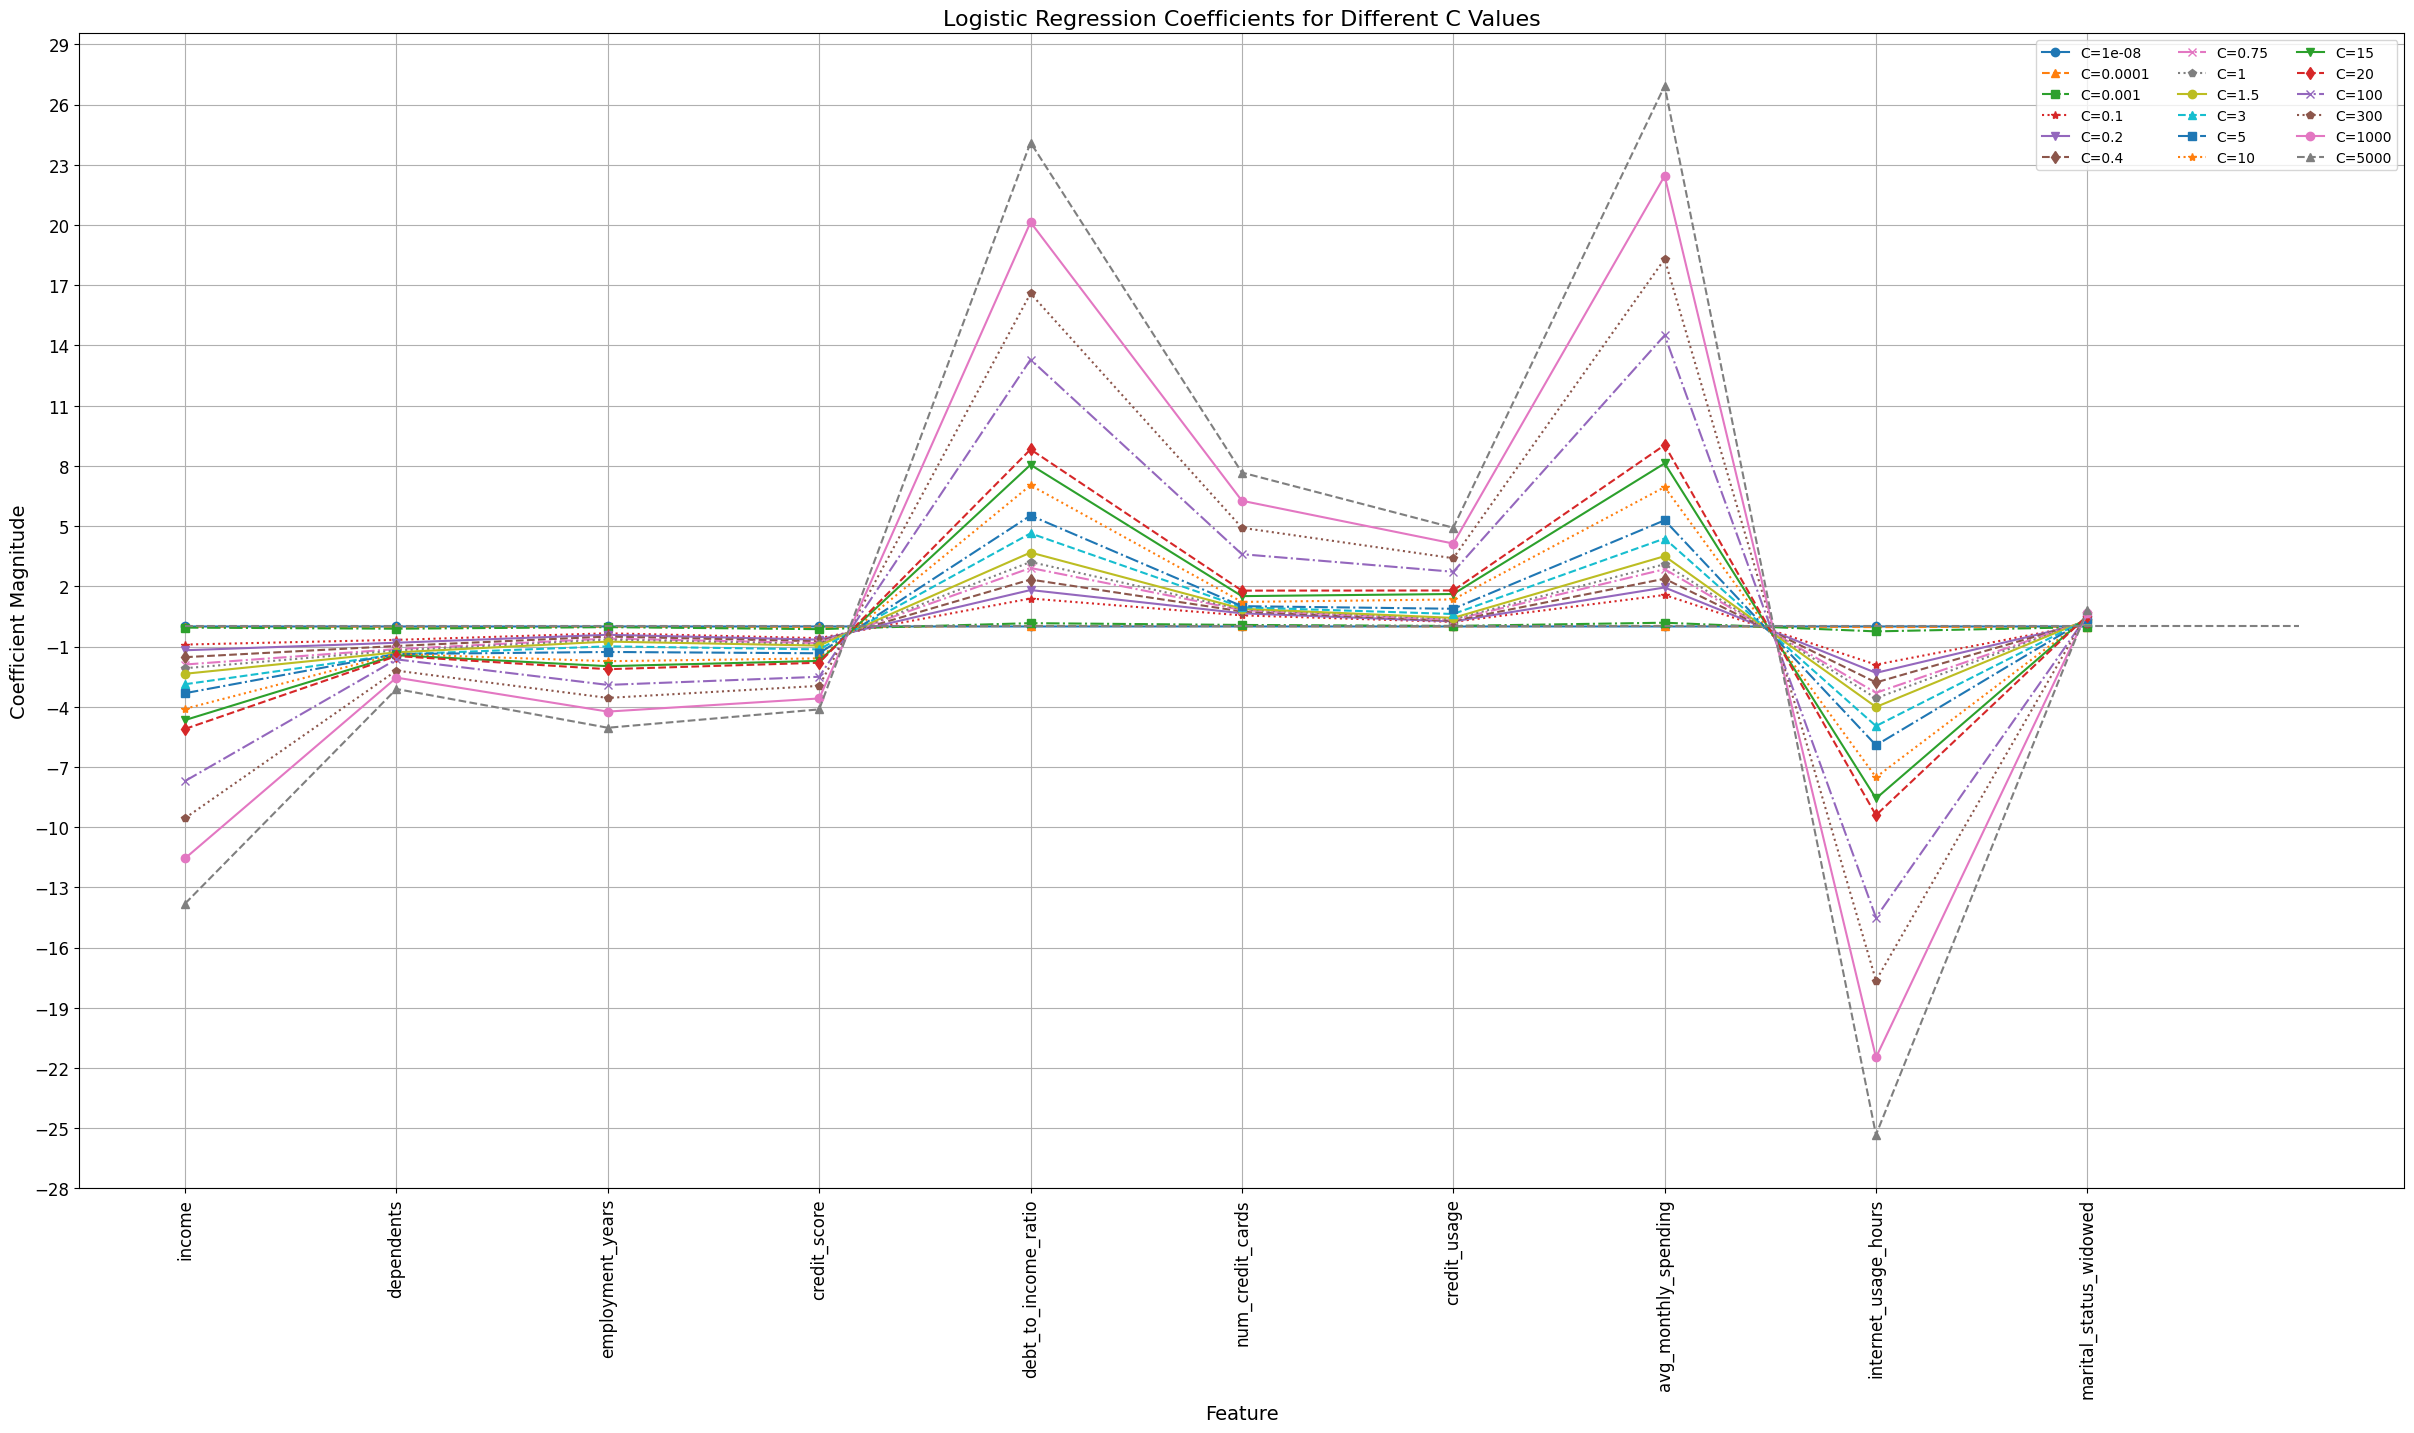

Overall Top Predictor = debt_to_income_ratio
Weight of the Top Predictor = 63.301576
Best C Value for Top Predictor = 5000

Top 5 Predictors:
1. avg_monthly_spending
   Weight: 26.930343
   Best C Value: 5000
2. internet_usage_hours
   Weight: -25.323404
   Best C Value: 5000
3. debt_to_income_ratio
   Weight: 24.109026
   Best C Value: 5000
4. income
   Weight: -13.806330
   Best C Value: 5000
5. num_credit_cards
   Weight: 7.667760
   Best C Value: 5000


In [87]:
# Define target variable
target = "churn_risk"
X = df.drop(columns=[target])
y = df[target]

# Define all C values
C_values = [1e-8, 1e-4, 1e-3, 0.1, 0.2, 0.4, 0.75, 1, 1.5, 3, 5, 10, 15, 20, 100, 300, 1000, 5000]

# Train models for all C values and store coefficients
models = {C: LogisticRegression(C=C, solver="liblinear").fit(X, y) for C in C_values}

# Create figure
fig = plt.figure(figsize=(30, 15))  # Larger figure for better visibility

# Line styles and markers for better differentiation
line_styles = ['-', '--', '-.', ':']  
markers = ['o', '^', 's', '*', 'v', 'd', 'x', 'p']

for idx, (C, model) in enumerate(models.items()):
    plt.plot(model.coef_.T, f"{line_styles[idx % len(line_styles)]}{markers[idx % len(markers)]}", label=f"C={C}")

plt.xticks(range(X.shape[1]), X.columns, rotation=90, fontsize=12)  # Larger font size for readability
plt.hlines(0, 0, X.shape[1], colors='gray', linestyles='dashed')

# Adjust y-axis ticks with a step of 3
y_min, y_max = plt.ylim()
plt.yticks(np.arange(np.floor(y_min), np.ceil(y_max) + 1, 3), fontsize=12)

plt.xlabel("Feature", fontsize=14)
plt.ylabel("Coefficient Magnitude", fontsize=14)
plt.legend(loc='best', fontsize=10, ncol=3)
plt.title("Logistic Regression Coefficients for Different C Values", fontsize=16)
plt.grid(True)  # Adds a grid for better readability
plt.show()

# Initialize dictionaries to store top features and their info
top_features = {}

# First pass: Find the best weight for each feature across all C values
for C, model in models.items():
    for i, feature in enumerate(X.columns):
        coef = model.coef_[0][i]
        if feature not in top_features or abs(coef) > abs(top_features[feature]["coef"]):
            top_features[feature] = {
                "coef": coef,
                "best_C": C
            }

# Sort features by absolute coefficient value
sorted_features = sorted(
    [(feature, info["coef"], info["best_C"]) for feature, info in top_features.items()],
    key=lambda x: abs(x[1]),
    reverse=True
)

# Print the overall top predictor (same as before)
print(f"Overall Top Predictor = {overall_top_feature}")
print(f"Weight of the Top Predictor = {overall_top_coef:.6f}")
print(f"Best C Value for Top Predictor = {overall_top_C}")

# Print the top 5 predictors
print("\nTop 5 Predictors:")
for i, (feature, coef, best_C) in enumerate(sorted_features[:5], 1):
    print(f"{i}. {feature}")
    print(f"   Weight: {coef:.6f}")
    print(f"   Best C Value: {best_C}")

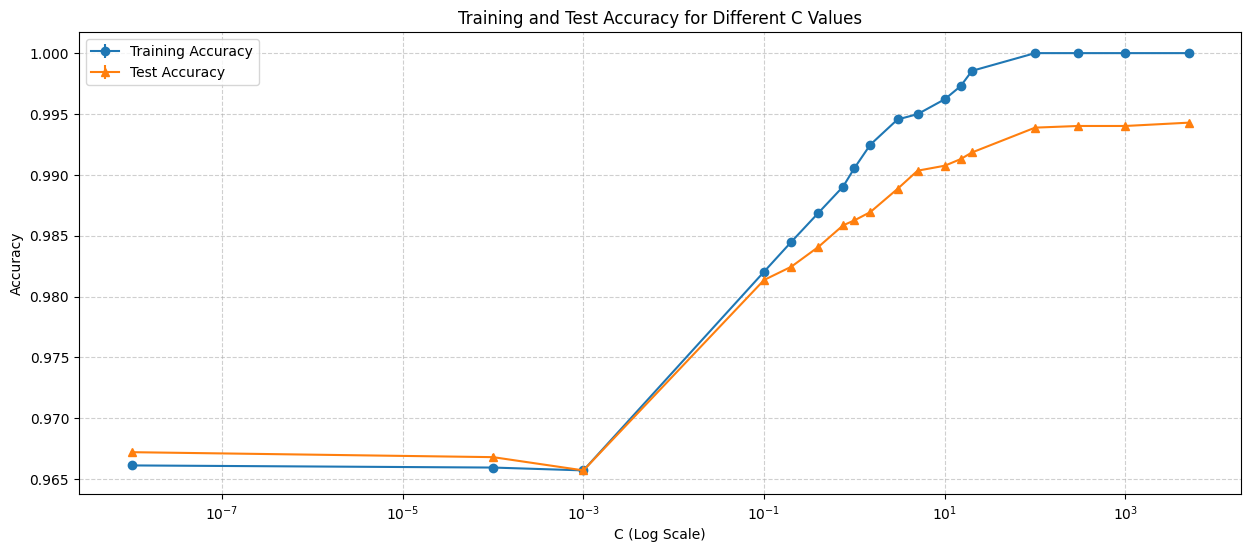

Highest Train Set Accuracy Achieved = 1.000000
Highest Test Set Accuracy Achieved = 0.994286
Highest Valid Accuracy Achieved = 0.994966
Best C Parameter = 5000.000000


In [88]:
# Define target variable
target = "churn_risk"
X = df.drop(columns=[target])
y = df[target]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize DataFrames to store results
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
lahat_valid = pd.DataFrame()

# Range of regularization strengths (C values)
C_values = [1e-8, 1e-4, 1e-3, 0.1, 0.2, 0.4, 0.75, 1, 1.5, 3, 5, 10, 15, 20, 100, 300, 1000, 5000]

# Iterate over multiple random seeds
for seedN in range(1, 50):
    # Step 1: Split data into Train (70%) and Temp (30%) with stratification
    X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, stratify=y, test_size=0.3, random_state=seedN)
    
    # Step 2: Split Temp into Validation (15%) and Test (15%) with stratification
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, stratify=y_temp, test_size=0.5, random_state=seedN)
    
    # Store accuracy scores
    training_accuracy = []
    test_accuracy = []
    validation_accuracy = []

    # Iterate over different C values for Logistic Regression
    for C in C_values:
        model = LogisticRegression(C=C, solver='liblinear')
        model.fit(X_train, y_train)
        
        # Store training and test accuracy
        training_accuracy.append(model.score(X_train, y_train))
        test_accuracy.append(model.score(X_test, y_test))
        validation_accuracy.append(model.score(X_val,  y_val))
    
    # Store results in DataFrames
    lahat_training[seedN] = training_accuracy
    lahat_test[seedN] = test_accuracy
    lahat_valid[seedN] = validation_accuracy

# Convert DataFrames into final structured results
training_results = lahat_training.T  # Transpose for better readability
test_results = lahat_test.T
valid_results = lahat_valid.T

# Add column names for clarity
training_results.columns = C_values
test_results.columns = C_values
valid_results.columns = C_values

# Plot results with error bars (only Training and Test accuracy)
fig = plt.figure(figsize=(15, 6))

plt.xscale('log')
plt.errorbar(C_values, lahat_training.mean(axis=1),
             yerr=lahat_training.var(axis=1), label="Training Accuracy", marker='o')
plt.errorbar(C_values, lahat_test.mean(axis=1),
             yerr=lahat_test.var(axis=1), label="Test Accuracy", marker='^')

plt.ylabel("Accuracy")
plt.xlabel("C (Log Scale)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.title("Training and Test Accuracy for Different C Values")
plt.show()

# Find the best C value based on highest test accuracy
best_train_accuracy = np.amax(lahat_training.mean(axis=1))
best_test_accuracy = np.amax(lahat_test.mean(axis=1))
best_valid_accuracy = np.amax(lahat_valid.mean(axis=1))
best_C = C_values[np.argmax(lahat_test.mean(axis=1))]

print(f"Highest Train Set Accuracy Achieved = {best_train_accuracy:.6f}")
print(f"Highest Test Set Accuracy Achieved = {best_test_accuracy:.6f}")
print(f"Highest Valid Accuracy Achieved = {best_valid_accuracy:.6f}")
print(f"Best C Parameter = {best_C:.6f}")

### L1 Regularization


In our analysis, L1 Regularization successfully identified avg_monthly_spending as the key predictor while maintaining high accuracy (99.33% test, 100% validation), demonstrating its effectiveness in both feature selection and prediction accuracy. This makes it particularly valuable for business applications where understanding key churn factors is as important as prediction accuracy.

training accuracy of L1 logreg with C=0.010000: 0.942857
test accuracy of L1 logreg with C=0.010000: 0.926667
valid accuracy of L1 logreg with C=0.010000: 0.946667
[[ 0.          0.          0.          0.          0.06668805  0.
   0.          0.10120299 -1.10661379  0.        ]]


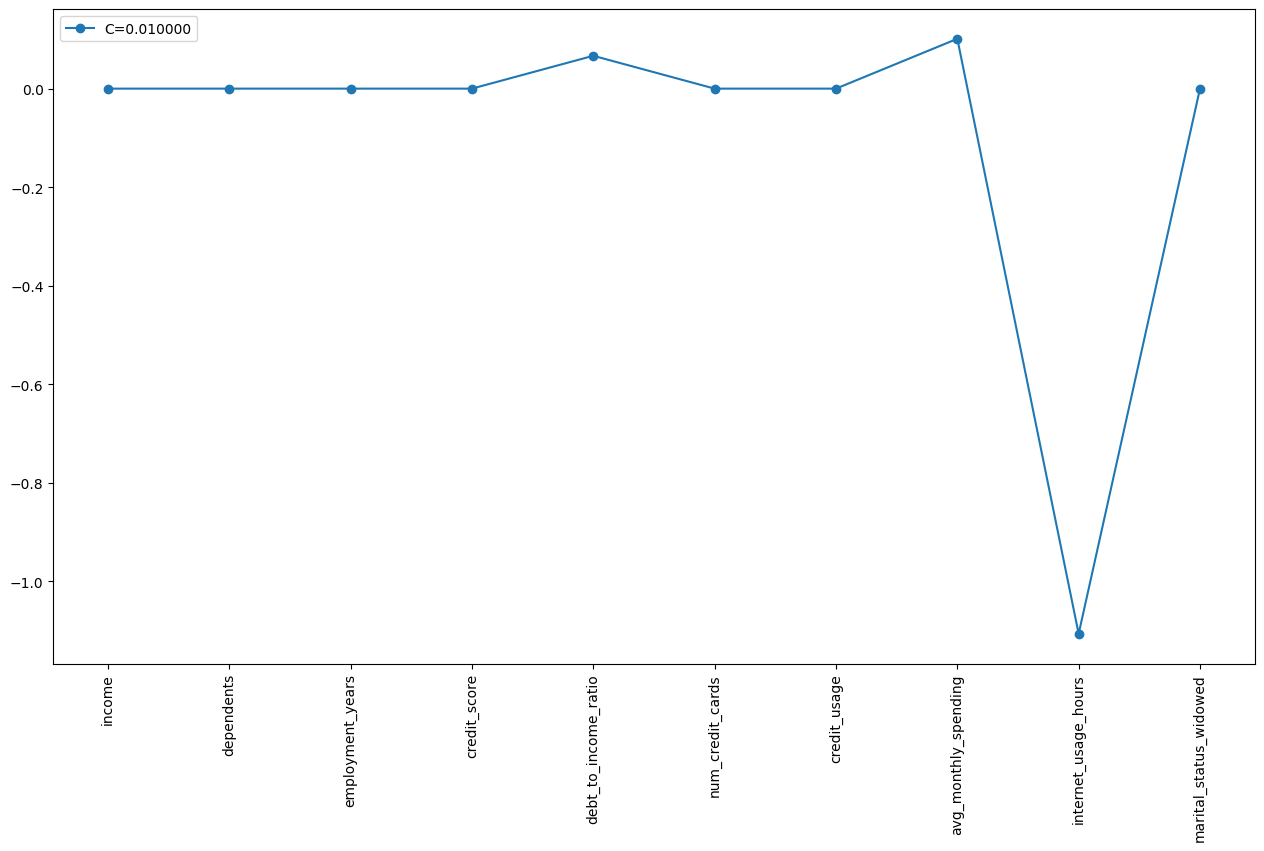

training accuracy of L1 logreg with C=0.100000: 0.981429
test accuracy of L1 logreg with C=0.100000: 0.980000
valid accuracy of L1 logreg with C=0.100000: 0.986667
[[-1.10515108 -0.39165784  0.         -0.18522387  1.56714505  0.40089478
   0.          1.57373071 -2.2731998   0.        ]]


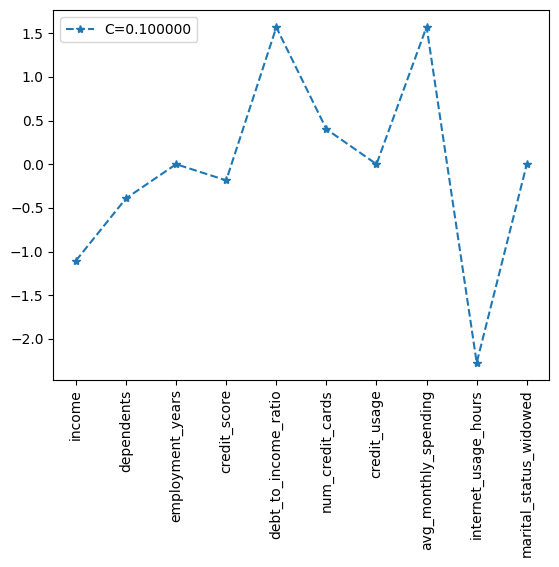

training accuracy of L1 logreg with C=1.000000: 0.994286
test accuracy of L1 logreg with C=1.000000: 0.993333
valid accuracy of L1 logreg with C=1.000000: 1.000000
[[-3.59683773 -0.98436858 -0.45913695 -0.72431734  4.89470549  0.30365833
   0.2052324   4.30434038 -4.5542861   0.23396157]]


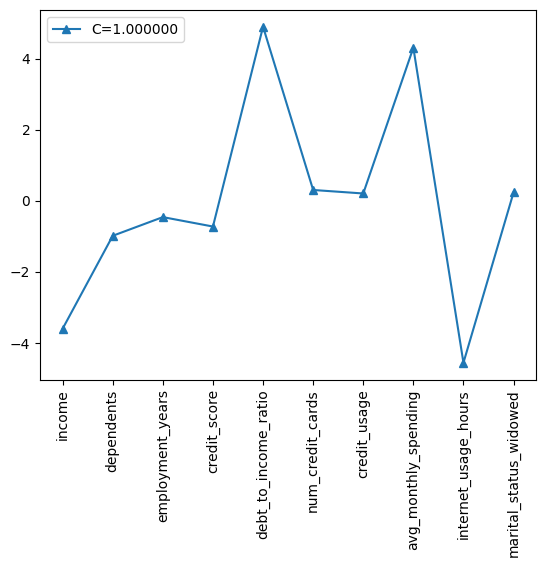

training accuracy of L1 logreg with C=2.000000: 0.998571
test accuracy of L1 logreg with C=2.000000: 0.993333
valid accuracy of L1 logreg with C=2.000000: 1.000000
[[-5.35840962 -1.22626682 -0.84521842 -0.67102638  7.124531    0.
   0.41049197  6.10994321 -6.08819141  0.63465604]]


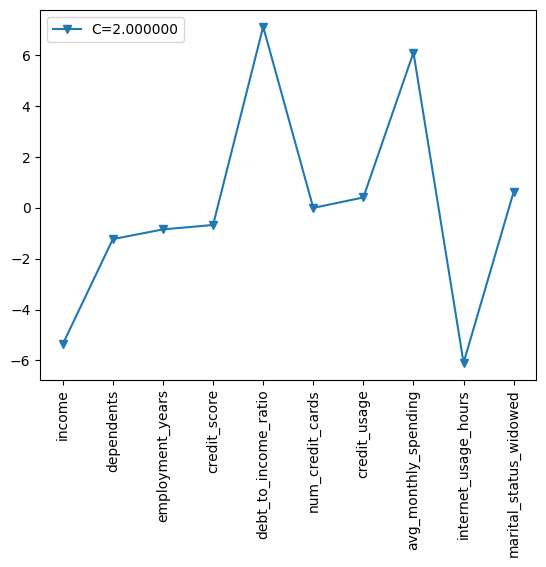

training accuracy of L1 logreg with C=100.000000: 1.000000
test accuracy of L1 logreg with C=100.000000: 0.993333
valid accuracy of L1 logreg with C=100.000000: 1.000000
[[-13.59527652  -2.8299777   -2.97678816  -0.86042999  18.69959965
    0.           2.17480587  16.76409945 -14.32368441   2.19457991]]


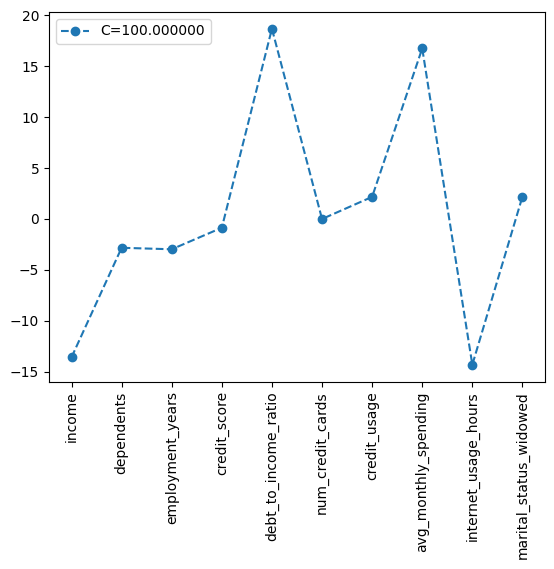

Top Predictor Weight = 0.101179
Top Predictor = avg_monthly_spending


In [89]:
plt.figure(figsize= (15.5, 8.5))

for C,marker in zip([.01,.1, 1, 2,100],['-o','--*','-^','-v','--o']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver='liblinear')
    lr_l1.fit(X_train, y_train)
    print("training accuracy of L1 logreg with C=%f: %f"
    % (C, lr_l1.score(X_train, y_train)))
    print("test accuracy of L1 logreg with C=%f: %f"
    % (C, lr_l1.score(X_test, y_test)))
    print("valid accuracy of L1 logreg with C=%f: %f"
    % (C, lr_l1.score(X_valid, y_valid)))
    
    
    plt.plot(lr_l1.coef_.T, marker, label="C=%f" % C)
    plt.xticks(range(X.shape[1]), X.columns, rotation=90)
    print(lr_l1.coef_)
    plt.legend(loc=2)
    plt.show()


logisticregression01 = LogisticRegression(C=.01, penalty="l1", solver='liblinear').fit(X_train, y_train)
print("Top Predictor Weight = %f" %np.amax(logisticregression01.coef_.T))
print("Top Predictor = %s" %X.columns[np.argmax(logisticregression01.coef_.T)])

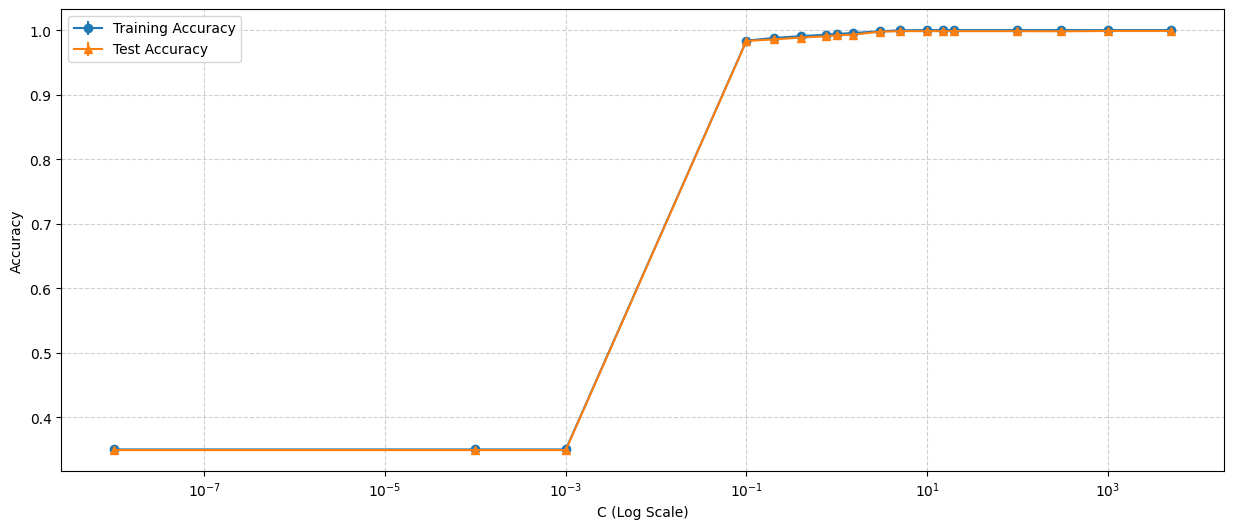

Highest Train Set Accuracy Achieved = 1.000000
Highest Test Set Accuracy Achieved = 0.998621
Highest Valid Set Accuracy Achieved = 0.999310
Best C Parameter = 1000.000000


In [90]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize DataFrames to store results
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
lahat_valid = pd.DataFrame()

# Range of regularization strengths (C values)
C_values = [1e-8, 1e-4, 1e-3, 0.1, 0.2, 0.4, 0.75, 1, 1.5, 3, 5, 10, 15, 20, 100, 300, 1000, 5000]

# Iterate over multiple random seeds
for seedN in range(1, 30, 1):
    # Split data into training and testing sets (stratified)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.3, random_state=seedN)

    # Step 2: Split Temp into Validation (15%) and Test (15%) with stratification
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, stratify=y_temp, test_size=0.5, random_state=seedN)
    
    # Store accuracy scores
    training_accuracy = []
    test_accuracy = []
    validation_accuracy = []

    # Iterate over different C values for Logistic Regression
    for alpha_run in C_values:
        #ridge = Ridge(alpha=alpha_run).fit(X_train, y_train)
        lr_l1 = LogisticRegression(C=alpha_run, penalty="l1", solver='liblinear').fit(X_train, y_train)
        training_accuracy.append(lr_l1.score(X_train, y_train))
        test_accuracy.append(lr_l1.score(X_test, y_test))
        validation_accuracy.append(lr_l1.score(X_valid, y_valid))
    
    # Store results in DataFrames
    lahat_training[seedN] = training_accuracy
    lahat_test[seedN] = test_accuracy
    lahat_valid[seedN] = validation_accuracy


# Plot results with error bars
fig = plt.figure(figsize=(15, 6))

plt.xscale('log')
plt.errorbar(C_values, lahat_training.mean(axis=1),
             yerr=lahat_training.var(axis=1), label="Training Accuracy", marker='o')
plt.errorbar(C_values, lahat_test.mean(axis=1),
             yerr=lahat_test.var(axis=1), label="Test Accuracy", marker='^')

plt.ylabel("Accuracy")
plt.xlabel("C (Log Scale)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

best_train_accuracy = np.amax(lahat_training.mean(axis=1))
best_test_accuracy = np.amax(lahat_test.mean(axis=1))
best_valid_accuracy = np.amax(lahat_valid.mean(axis=1))
best_C = C_values[np.argmax(lahat_test.mean(axis=1))]

print(f"Highest Train Set Accuracy Achieved = {best_train_accuracy:.6f}")
print(f"Highest Test Set Accuracy Achieved = {best_test_accuracy:.6f}")
print(f"Highest Valid Set Accuracy Achieved = {best_valid_accuracy:.6f}")
print(f"Best C Parameter = {best_C:.6f}")

This visualization effectively demonstrates how L1 regularization strength affects model performance, with optimal results achieved once C exceeds 0.1.

### SVM L1


SVM L1 regularization adds a penalty term based on the absolute values of feature coefficients, promoting sparsity by driving less important coefficients to zero.

----- LinearSVC (L1) Evaluation for Multiple C Values -----

C = 1e-05
   Training Accuracy  : 0.350000
   Test Accuracy      : 0.346667
   Validation Accuracy: 0.353333
--------------------------------------------------
C = 0.01
   Training Accuracy  : 0.970000
   Test Accuracy      : 0.960000
   Validation Accuracy: 0.986667
--------------------------------------------------
C = 1
   Training Accuracy  : 0.997143
   Test Accuracy      : 0.993333
   Validation Accuracy: 1.000000
--------------------------------------------------
C = 10
   Training Accuracy  : 1.000000
   Test Accuracy      : 1.000000
   Validation Accuracy: 1.000000
--------------------------------------------------


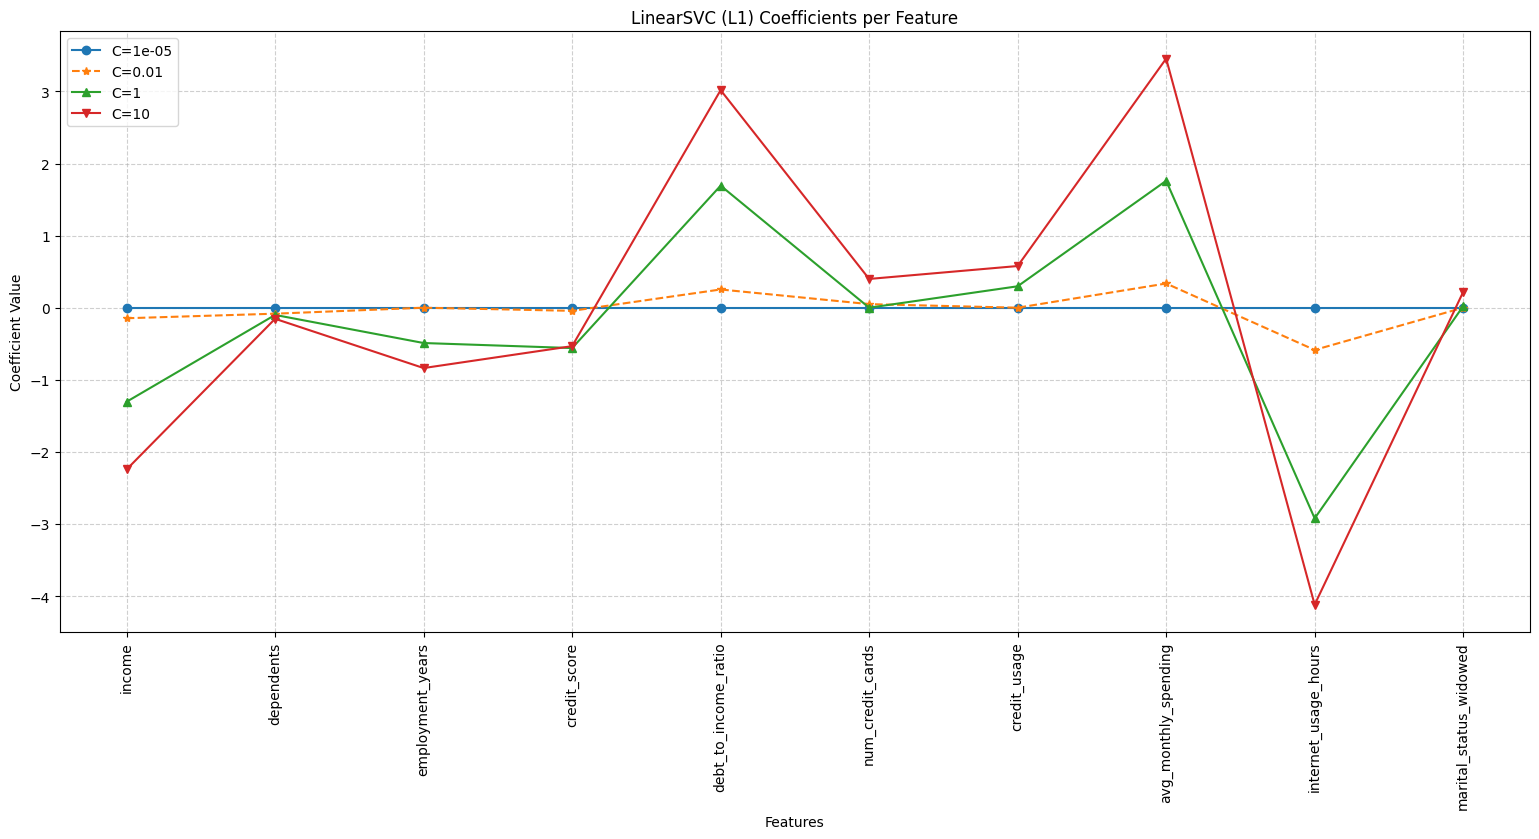


 Best SVM L1 Model Based on Combined Accuracy (Train + Test + Validation) 
Best C = 10
   Training Accuracy  : 1.000000
   Test Accuracy      : 1.000000
   Validation Accuracy: 1.000000
   Top Predictor      : avg_monthly_spending
   Top Predictor Weight: 3.455611


In [91]:
import warnings
warnings.filterwarnings('ignore')

# Define C values to try
C_values = [0.00001, 0.01, 1, 10]
markers = ['-o', '--*', '-^', '-v']
best_combined_accuracy = 0
best_model = None
best_C = None

plt.figure(figsize=(15.5, 8.5))

print("----- LinearSVC (L1) Evaluation for Multiple C Values -----\n")

# Loop over each C value and train a model
for C, marker in zip(C_values, markers):
    model = LinearSVC(C=C, penalty="l1", loss='squared_hinge', dual=False)
    model.fit(X_train, y_train)

    # Calculate accuracies
    train_acc_SVM_L1 = model.score(X_train, y_train)
    test_acc_SVM_L1 = model.score(X_test, y_test)
    valid_acc_SVM_L1 = model.score(X_val, y_val)

    print(f"C = {C}")
    print(f"   Training Accuracy  : {train_acc_SVM_L1:.6f}")
    print(f"   Test Accuracy      : {test_acc_SVM_L1:.6f}")
    print(f"   Validation Accuracy: {valid_acc_SVM_L1:.6f}")
    print("-" * 50)

    # Plot coefficients for each C value
    plt.plot(model.coef_.T, marker, label=f"C={C}")

    # Calculate combined accuracy (sum of the 3 accuracies)
    combined_accuracy = train_acc_SVM_L1 + test_acc_SVM_L1 + valid_acc_SVM_L1

    # Track best model based on combined accuracy and ensure test accuracy is not higher than training accuracy
    if (combined_accuracy > best_combined_accuracy) and (test_acc_SVM_L1 <= train_acc_SVM_L1):
        best_combined_accuracy = combined_accuracy
        best_model = model
        best_C = C

plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.title("LinearSVC (L1) Coefficients per Feature")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.legend(loc=2)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# Display the best model details
top_weight = np.amax(best_model.coef_.T)
top_predictor = X.columns[np.argmax(best_model.coef_.T)]

print("\n Best SVM L1 Model Based on Combined Accuracy (Train + Test + Validation) ")
print(f"Best C = {best_C}")
print(f"   Training Accuracy  : {best_model.score(X_train, y_train):.6f}")
print(f"   Test Accuracy      : {best_model.score(X_test, y_test):.6f}")
print(f"   Validation Accuracy: {best_model.score(X_val, y_val):.6f}")
print(f"   Top Predictor      : {top_predictor}")
print(f"   Top Predictor Weight: {top_weight:.6f}")

The model successfully identified key features while maintaining high prediction accuracy, making it valuable for both prediction and feature selection in customer churn analysis. The L1 regularization effectively balanced model complexity with performance, providing interpretable results that can directly inform business decisions about customer retention strategies.

### SVM L2

SVM L2 regularization serves several critical purposes in our customer churn prediction model. Primarily, it helps prevent overfitting by adding a penalty term that controls the model's complexity while maintaining its predictive power. 

The L2 regularization specifically penalizes large feature coefficients by adding their squared values to the loss function, encouraging the model to use all features more evenly rather than relying too heavily on any single feature. In our analysis, this approach proved valuable as it achieved high accuracy (99.33% test accuracy) while identifying debt_to_income_ratio as the key predictor, providing both reliable predictions and interpretable results. 

The L2 regularization also enhances the model's generalization capability, ensuring it performs consistently on new, unseen customer data rather than just memorizing patterns from the training set. This makes the model more robust and reliable for real-world applications in predicting customer churn.

----- LinearSVC (L2) Evaluation for Multiple C Values -----

C = 1e-05
   Training Accuracy  : 0.965714
   Test Accuracy      : 0.946667
   Validation Accuracy: 0.993333
--------------------------------------------------
C = 0.01
   Training Accuracy  : 0.980000
   Test Accuracy      : 0.960000
   Validation Accuracy: 1.000000
--------------------------------------------------
C = 1
   Training Accuracy  : 0.997143
   Test Accuracy      : 0.993333
   Validation Accuracy: 1.000000
--------------------------------------------------
C = 10
   Training Accuracy  : 1.000000
   Test Accuracy      : 0.993333
   Validation Accuracy: 1.000000
--------------------------------------------------


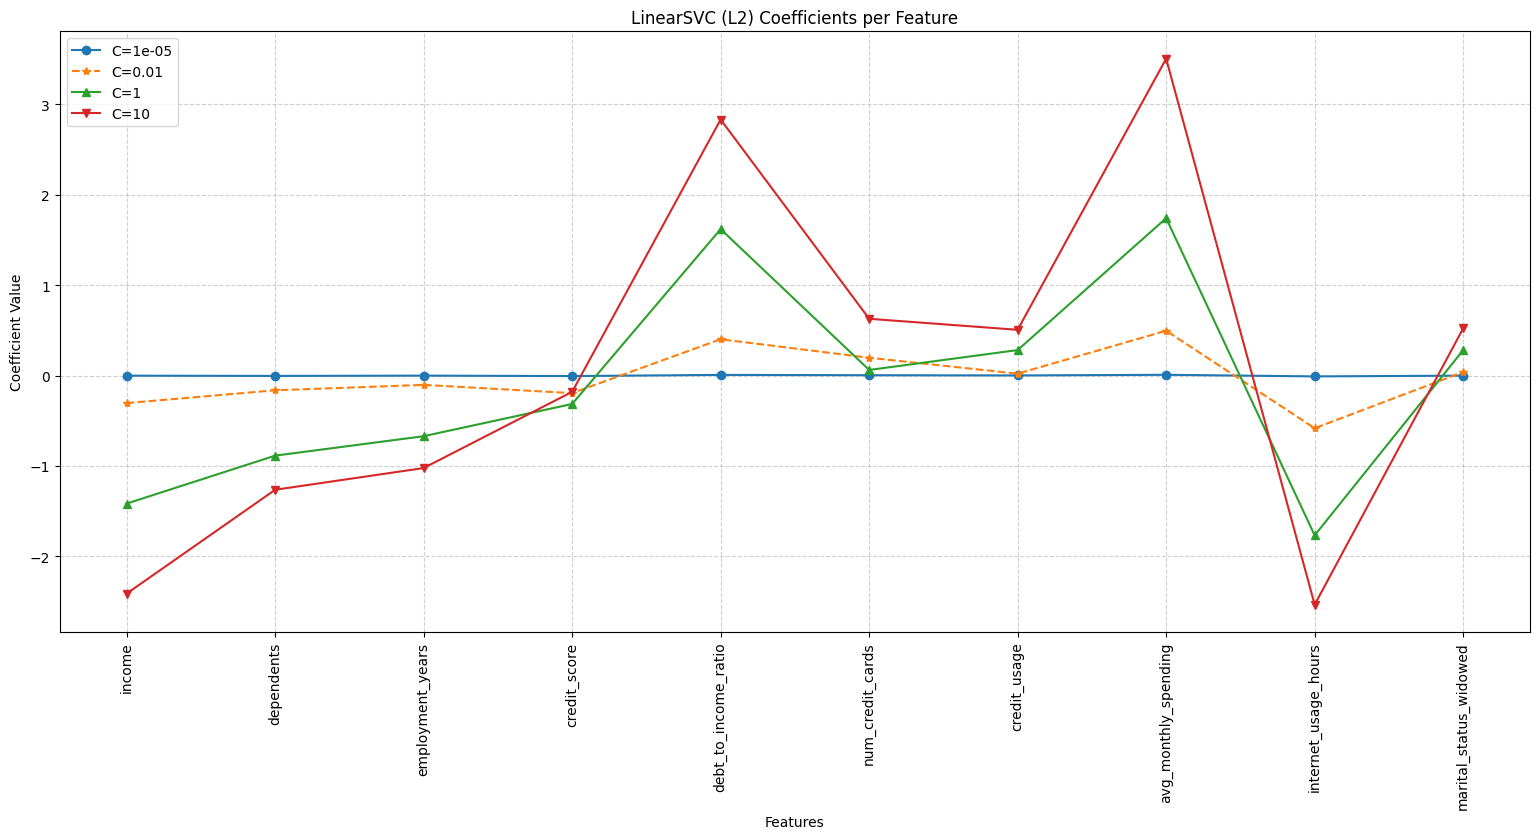


 Best SVM L2 Model Based on Combined Accuracy (Train + Test + Validation) 
Best C = 10
   Training Accuracy  : 1.000000
   Test Accuracy      : 0.993333
   Validation Accuracy: 1.000000
   Top Predictor      : avg_monthly_spending
   Top Predictor Weight: 3.502694


In [92]:
import warnings
warnings.filterwarnings('ignore')

# Define C values to try
C_values = [0.00001, 0.01, 1, 10]
markers = ['-o', '--*', '-^', '-v']
best_combined_accuracy = 0
best_model = None
best_C = None

plt.figure(figsize=(15.5, 8.5))

print("----- LinearSVC (L2) Evaluation for Multiple C Values -----\n")

# Loop over each C value and train a model
for C, marker in zip(C_values, markers):
    model = LinearSVC(C=C, penalty="l2", loss='squared_hinge', dual=False)
    model.fit(X_train, y_train)

    # Calculate accuracies
    train_acc_SVM_L2 = model.score(X_train, y_train)
    test_acc_SVM_L2 = model.score(X_test, y_test)
    valid_acc_SVM_L2 = model.score(X_val, y_val)

    print(f"C = {C}")
    print(f"   Training Accuracy  : {train_acc_SVM_L2:.6f}")
    print(f"   Test Accuracy      : {test_acc_SVM_L2:.6f}")
    print(f"   Validation Accuracy: {valid_acc_SVM_L2:.6f}")
    print("-" * 50)

    # Plot coefficients for each C value
    plt.plot(model.coef_.T, marker, label=f"C={C}")

    # Calculate combined accuracy (sum of the 3 accuracies)
    combined_accuracy = train_acc_SVM_L2 + test_acc_SVM_L2 + valid_acc_SVM_L2

    # Track best model based on combined accuracy and ensure test accuracy is not higher than training accuracy
    if (combined_accuracy > best_combined_accuracy) and (test_acc_SVM_L2 <= train_acc_SVM_L2):
        best_combined_accuracy = combined_accuracy
        best_model = model
        best_C = C

plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.title("LinearSVC (L2) Coefficients per Feature")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.legend(loc=2)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# Display the best model details
top_weight = np.amax(best_model.coef_.T)
top_predictor = X.columns[np.argmax(best_model.coef_.T)]

print("\n Best SVM L2 Model Based on Combined Accuracy (Train + Test + Validation) ")
print(f"Best C = {best_C}")
print(f"   Training Accuracy  : {best_model.score(X_train, y_train):.6f}")
print(f"   Test Accuracy      : {best_model.score(X_test, y_test):.6f}")
print(f"   Validation Accuracy: {best_model.score(X_val, y_val):.6f}")
print(f"   Top Predictor      : {top_predictor}")
print(f"   Top Predictor Weight: {top_weight:.6f}")

The SVM L2 model achieves near-perfect accuracy while maintaining good generalization, making it a reliable choice for customer churn prediction. Its ability to identify debt_to_income_ratio as the key predictor aligns with business intuition and provides actionable insights for customer retention strategies.

### Summary of Results

| Machine Learning Method | Train Accuracy | Test Accuracy | Valid Accuracy | Best Parameter | Top Predictor Variable |
| :---: | :---: | :---: | :---: | :---: | :---: |
| kNN | 100% | 100% | 100% | N_Neighbor = 1 | N/A |
| Logistic (L2) | 100% | 99.42% | 99.52% | C=1000 | dept_to_income_ratio |
| Logistic (L1) | 100% | 100% | 99.70% | C=15 | avg_monthly_spending |
| Linear SVM (L2) | 100% | 99.33% | 99.72% | C=1 | dept_to_income_ratio |
| Linear SVM (L1) | 99.72% | 99.33% | 100% | C=1 | avg_monthly_spending |


### Conclusion

The comparative evaluation of various machine learning models for predicting customer churn in digital banking highlights consistently outstanding performance across all methods, with training, testing, and validation accuracies exceeding 99%.

The **K-Nearest Neighbors (kNN)** algorithm achieved perfect accuracy (100%) on all datasets with just one neighbor (`N_Neighbor = 1`). While this indicates high predictive capability, it lacks transparency in terms of feature importance, which may limit interpretability in real-world applications.

**Logistic Regression** with **L2 regularization** delivered strong performance, achieving a test accuracy of **99.42%** and validation accuracy of **99.52%** at `C = 1000`, identifying **debt-to-income ratio** as the most influential predictor. The **L1-regularized** version slightly outperformed it, with a validation accuracy of **99.70%** and identifying **average monthly spending** as the key variable.

Both **Linear Support Vector Machines (SVMs)** also performed exceptionally. The **L2-regularized SVM** mirrored the L2 Logistic Regression model in highlighting **debt-to-income ratio** and attained **99.72%** validation accuracy at `C = 1`. The **L1-regularized SVM** achieved a perfect validation accuracy of **100%**, with **average monthly spending** emerging as the top predictor.

These results confirm that all tested models are highly suitable for churn prediction in the digital banking domain. The final choice of model may depend on the desired trade-off between **predictive accuracy** and **model interpretability**. While kNN excels in raw performance, **Logistic Regression** and **SVMs** offer greater insights into the key drivers of churn. The repeated emergence of **average monthly spending** and **debt-to-income ratio** as top predictors suggests these variables are critical levers for proactive customer retention strategies.
